# Cross validation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

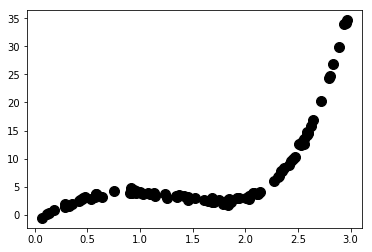

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [3]:
x=np.vstack(x)

# k-fold

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [5]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

# podział na 3 foldy, w każdej iteracji inny fold odłożony na test końcowy

TRAIN: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
0.7547772148137046
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66]
0.7924571646343214
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66] TEST: [67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97 98 99]
0.

In [9]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]
# co to za wyniki?

[0.7547772148137046, 0.7924571646343214, 0.7215253367583968]

# cross_val_score

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([0.75477721, 0.79245716, 0.72152534])

In [12]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')
# wyniki R2 dla każdego folda?

array([0.75477721, 0.79245716, 0.72152534])

In [13]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-3.06697671, -2.66191462, -3.10786324])

# cross_val_predict

In [14]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([14.89287999,  0.21424599,  2.72661836,  0.36881624,  0.18201188,
        9.92081825, 19.31198523, 21.56496484,  0.11132753,  5.14737395,
       16.30383221,  2.28035274,  1.19169225,  6.36183673, 22.37161974,
        0.09961383,  5.51898312,  0.36995603,  5.96022003,  5.77912497,
        8.23685413,  9.29375798,  3.93413916,  3.74195546, 15.51644774,
        2.69258755, 21.25200797,  0.79941392, 12.70152249, 10.87912854,
        0.56926929,  6.14427366, 16.44824081,  0.81437901,  4.76511841,
       15.99811463,  4.18365945,  1.64011066,  7.1291724 ,  4.47335231,
        0.72897386,  6.68287263, 11.33960957, 13.21283215,  5.84738127,
        1.24157885,  4.10066331,  0.64125853, 14.62652755,  4.10163701,
        1.31186895,  0.68555446,  2.55696581, 23.03079305, 22.67243732,
        1.52730875, 15.41587424,  8.03492871,  2.92276138,  7.24449326,
        0.87326295,  1.89041547,  1.71267032, 12.85489208, 21.50156026,
       12.51277384,  1.90867631,  0.13330128,  4.5167951 ,  2.26